In [12]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-hin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1.1 [913 kB]
Fetched 913 kB in 1s (769 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-hin.
(Reading databa

In [33]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [34]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

R2065510

ASMA

Pe
‘ =
F 30/07/1987
i HYDERABAD, TELANGANA

Asm S HYDERABAD

05/09/2017 04/09/2027

PSIND<KASMAK KK <<< Kk KKK Kk KK KK EKER KK KEKE RK
R2065510<41ND8707305F2 709042 <<ccececccceeccs



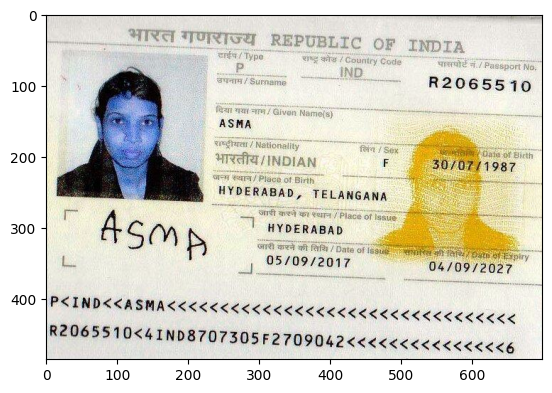

In [36]:
img = cv2.imread("/content/passport.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
result = pytesseract.image_to_string(threshed, lang="eng")
print(result)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [37]:
for word in result.split("\n"):
  if "_" in word:
    word - word.replace("_", ":")
#normalize "NIK" in word:
if "NIK" in word:
  nik_char = word.split()
  if "D" in word:
    word = word.replace("D", "0")
  if "?" in word:
    word = word.replace("D", "7")
print(word)

In [38]:
import pandas as pd

try:
    pd.set_option('display.max_columns', None)
except OptionError:
    print("display.max_columns didn't work, trying other options")
    try:
        pd.set_option('max_colwidth', None)
        pd.set_option('max_cols', None)
        pd.set_option('column_space', None)
    except OptionError:
        print("Other options didn't work either.")
pd.set_option('display.max_rows', text.shape[0]+1)

In [39]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")

print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    699   
1       2         1          1        0         0         0   540   88    143   
2       3         1          1        1         0         0   540   88    143   
3       4         1          1        1         1         0   540   88    143   
4       5         1          1        1         1         1   540   88    143   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
48      5         1          6        1         1        12   636  421     25   
49      4         1          6        1         2         0     6  433    654   
50      5         1          6        1         2         1     6  433    323   
51      5         1          6        1         2         2   334  433     85   
52      5         1          6        1         2         3   422  433    238   

    height  conf 

In [40]:
from pytesseract import Output

img = cv2.imread('passport.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


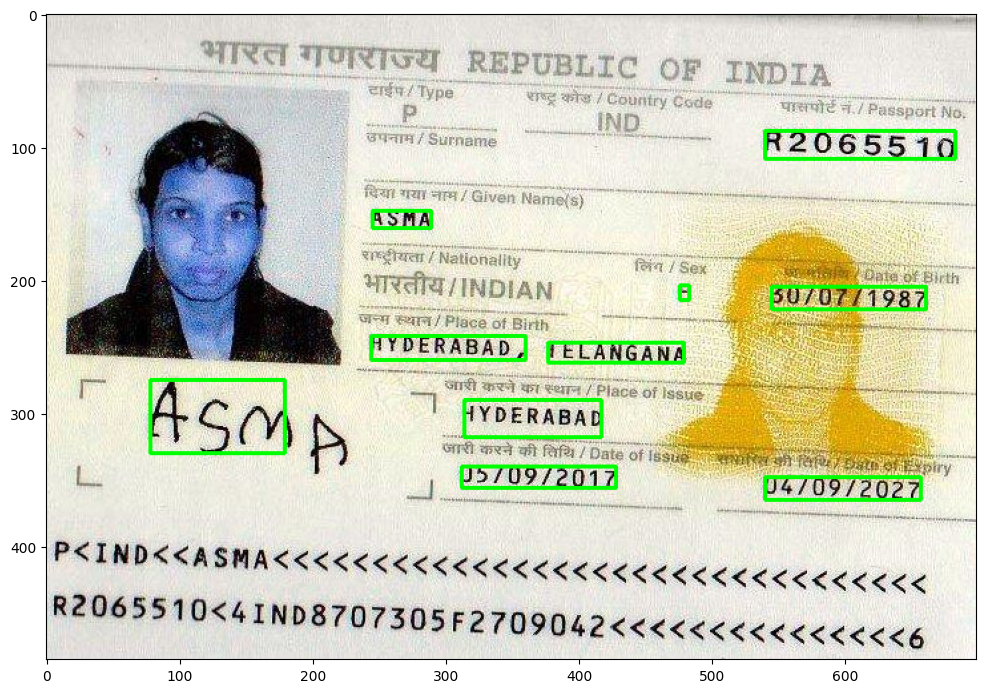

In [19]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)